In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("../survey_lung_cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


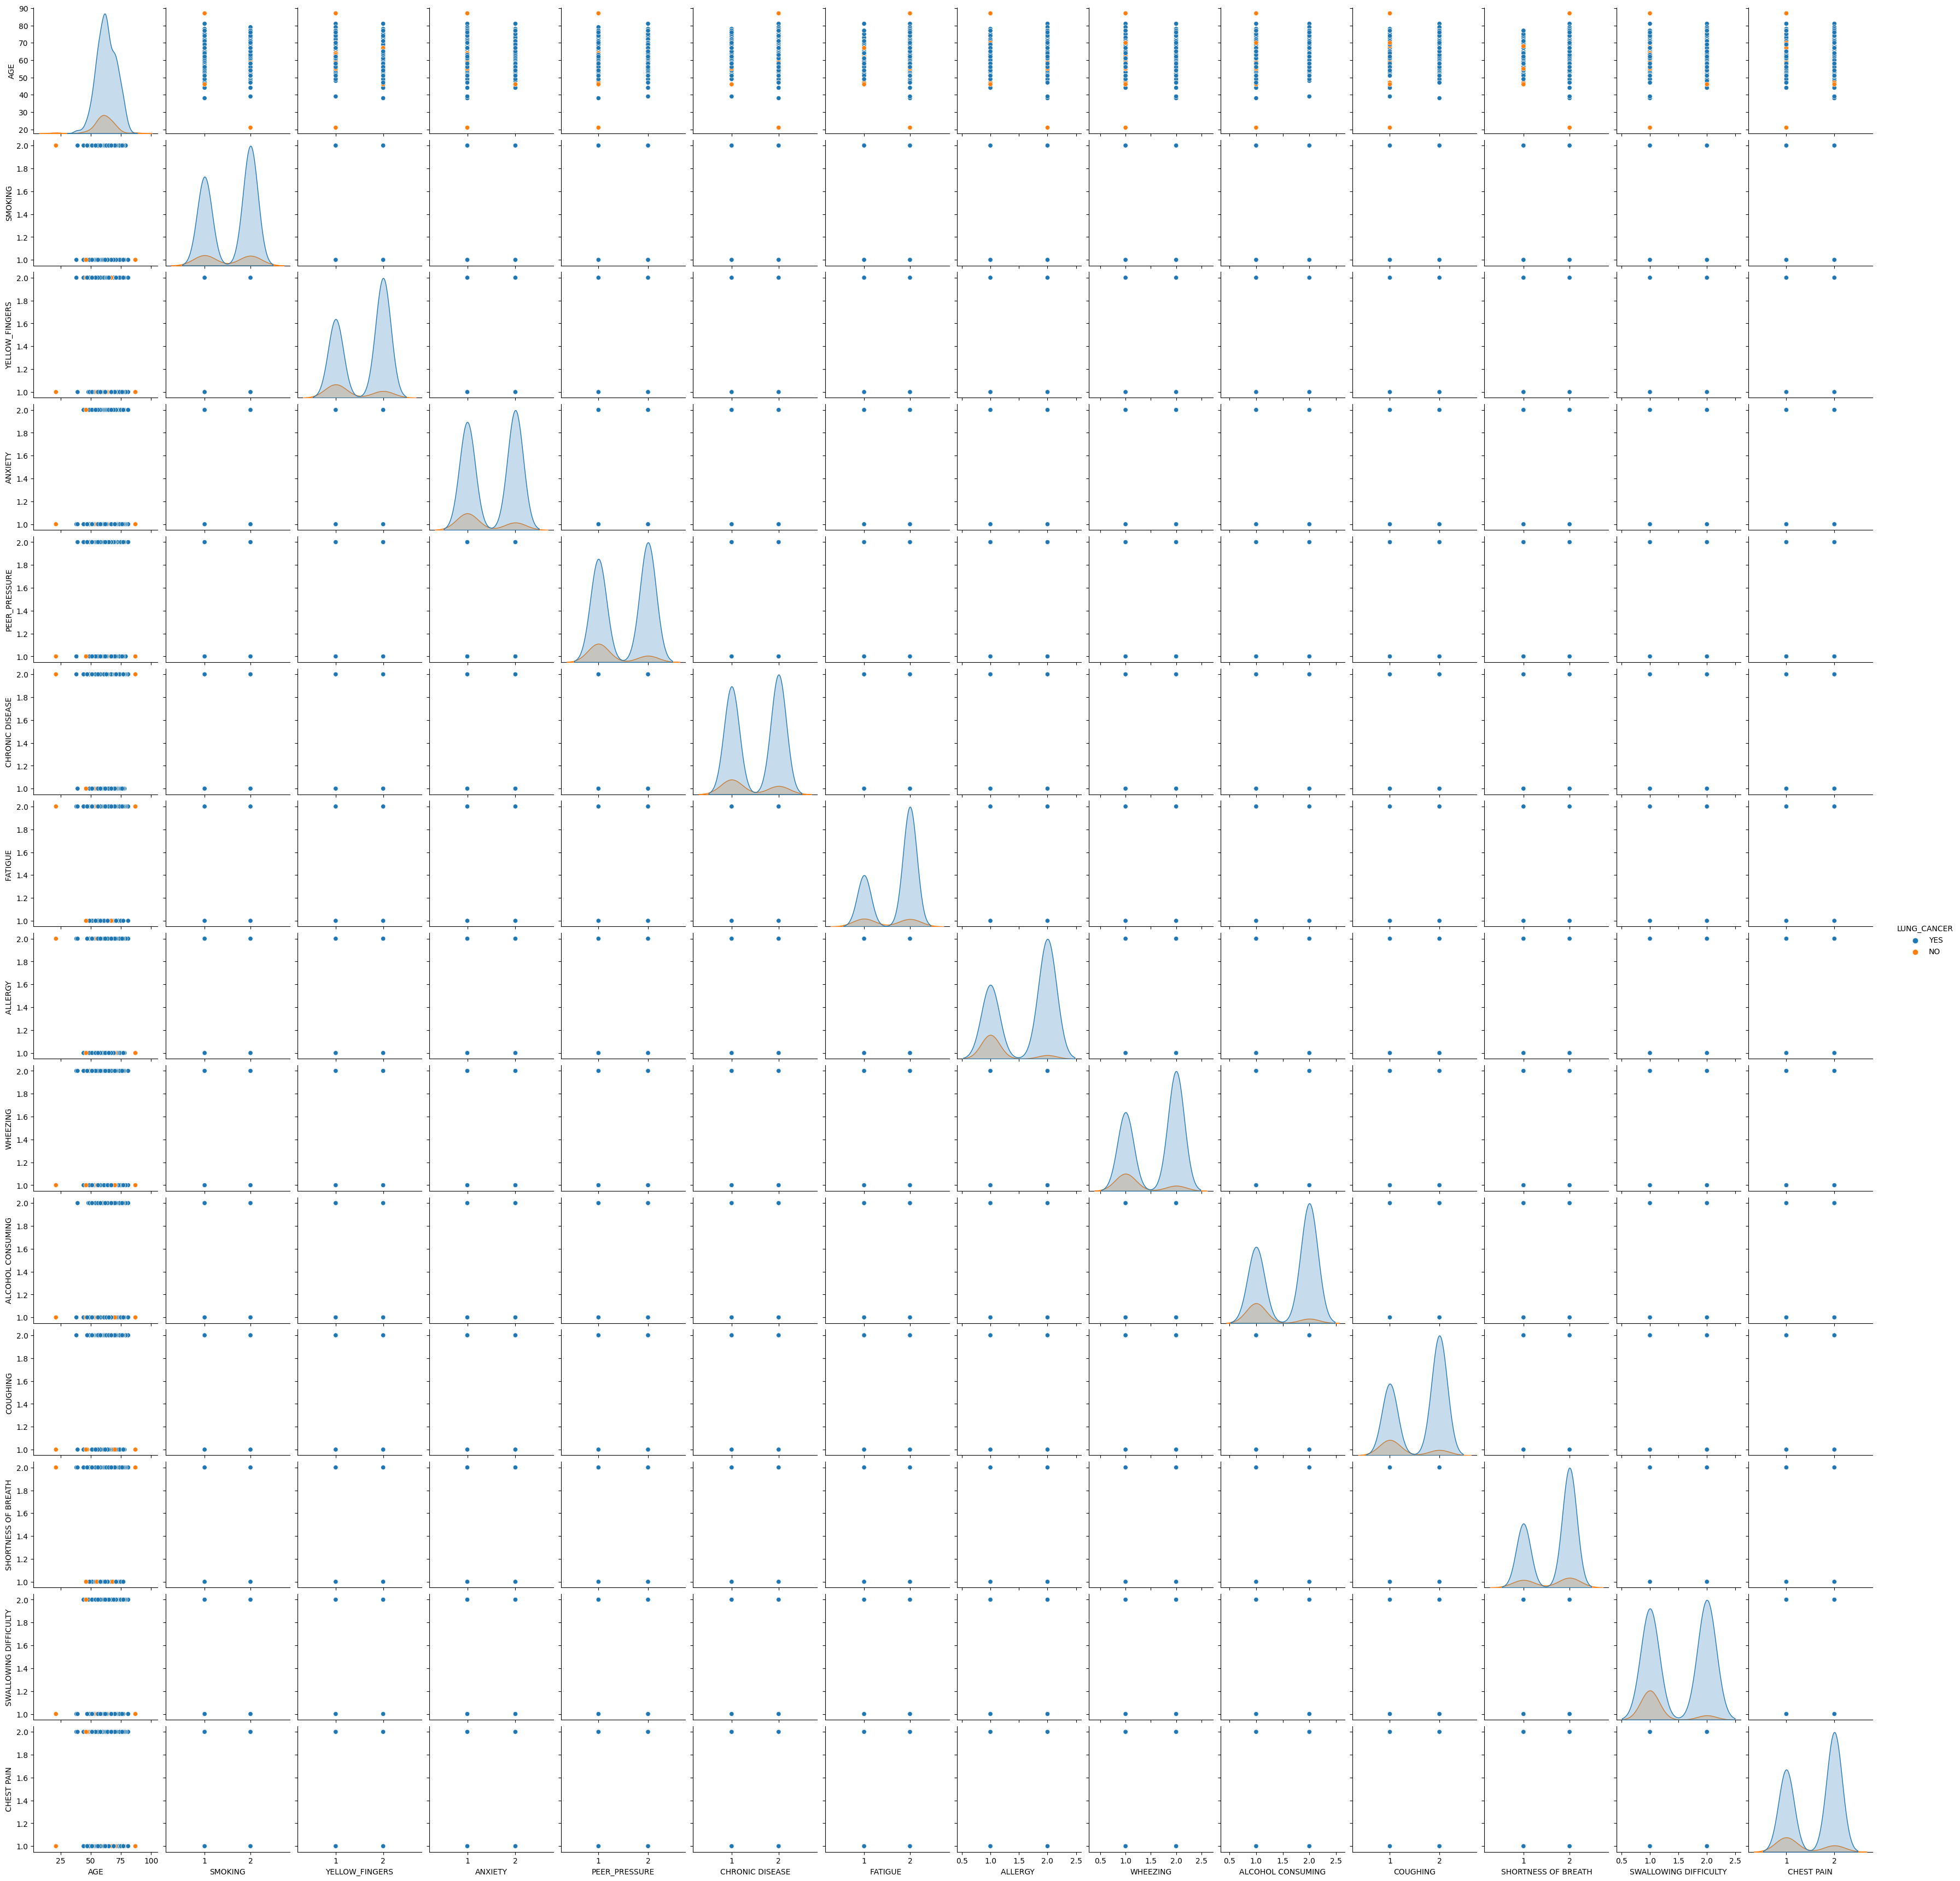

In [7]:
sns.pairplot(df, hue="LUNG_CANCER")

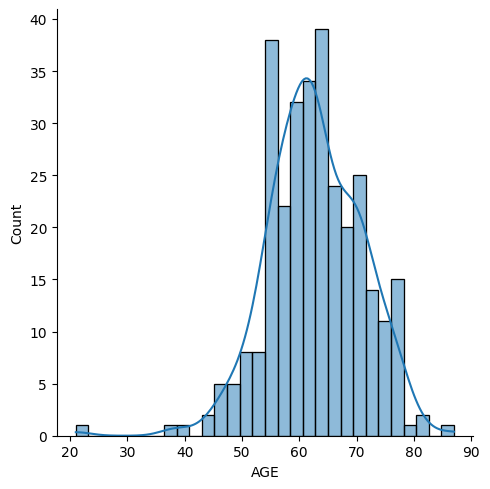

In [11]:
sns.displot(df['AGE'], bins=30, kde=True)

In [ ]:
for feature in ["AGE"]:
    sns.histplot(data=df, x=feature, hue='label', kde=True)
    plt.title(f'Distribution of {feature} by Label')
    plt.show()

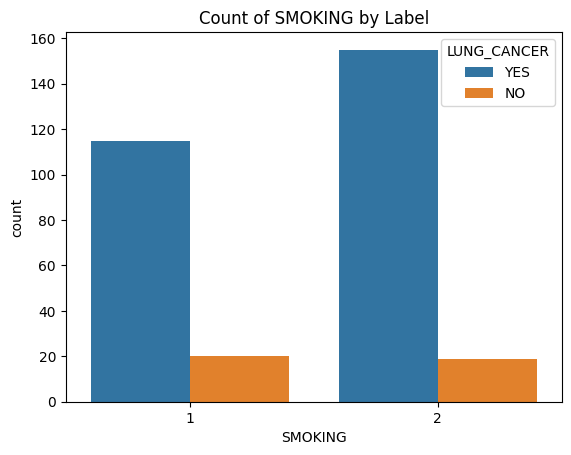

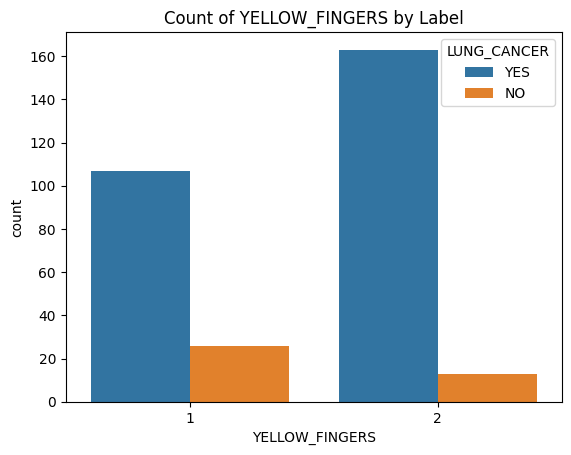

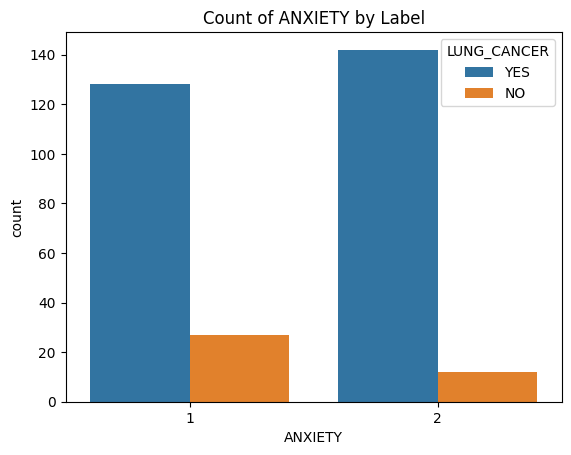

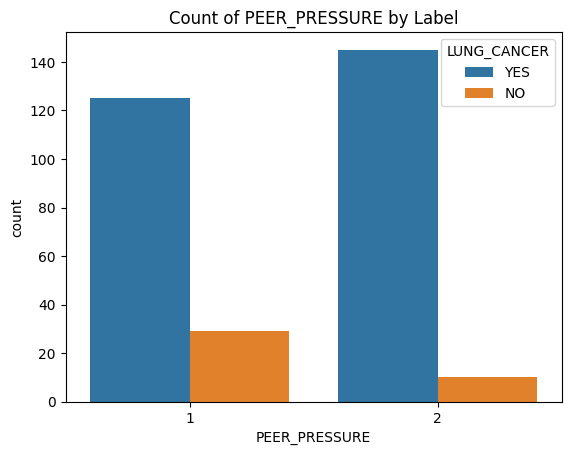

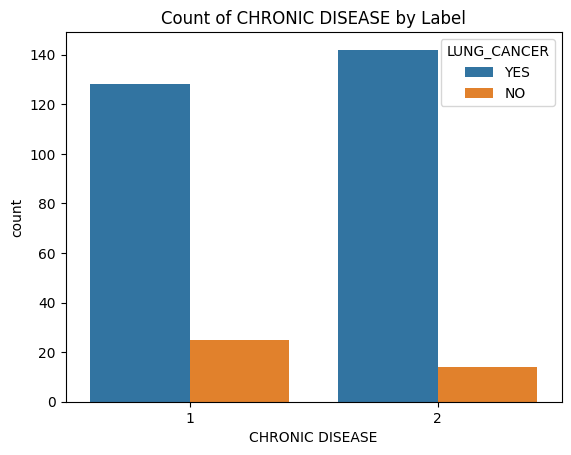

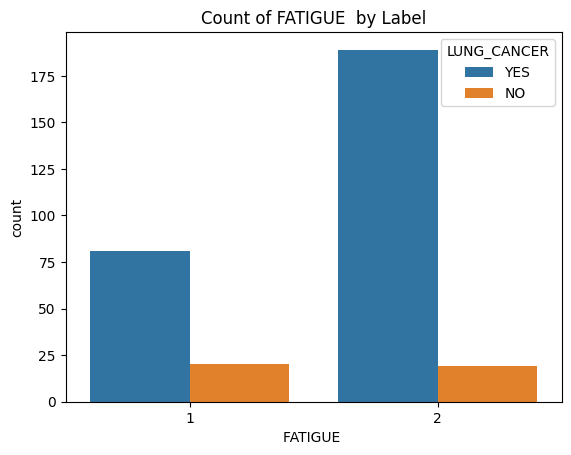

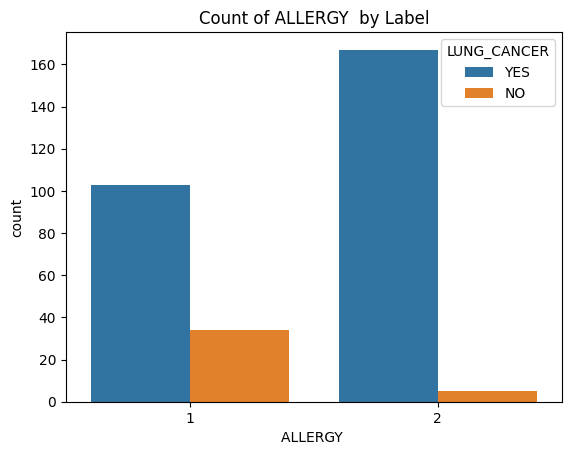

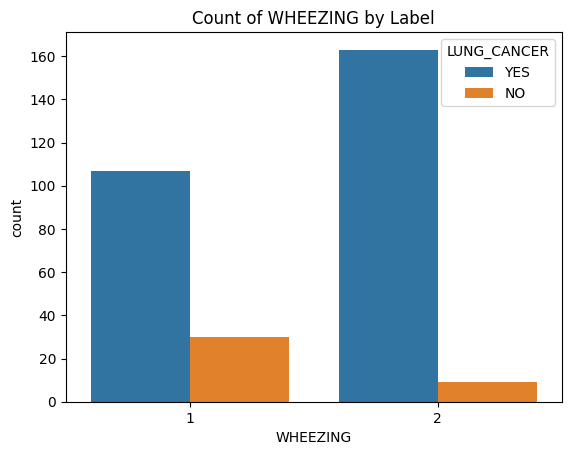

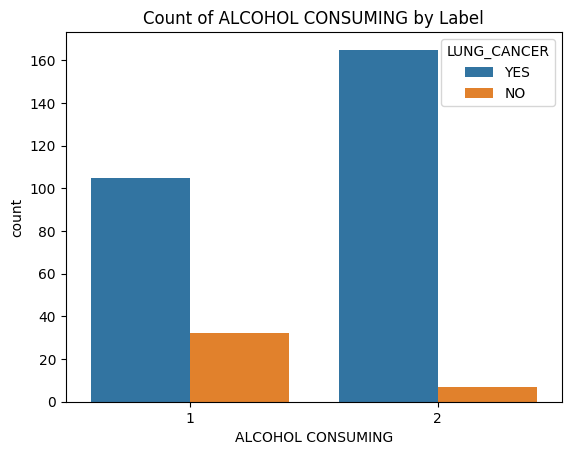

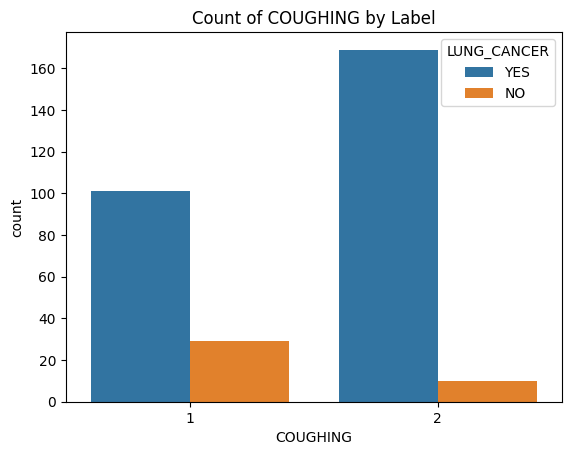

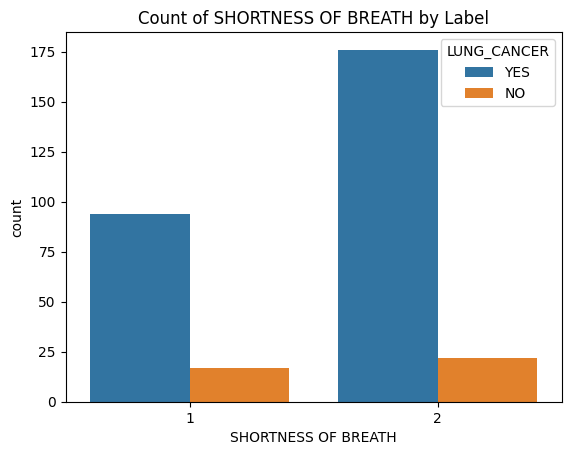

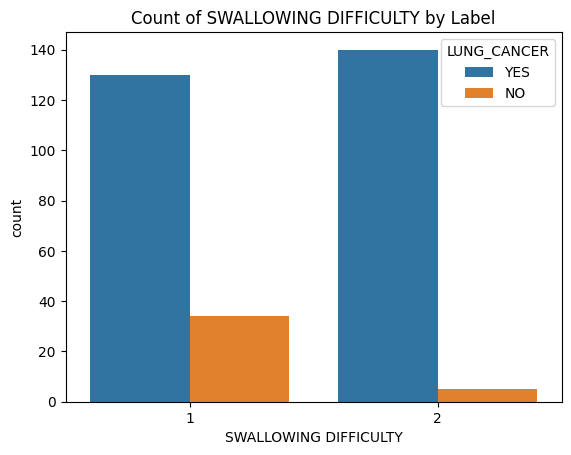

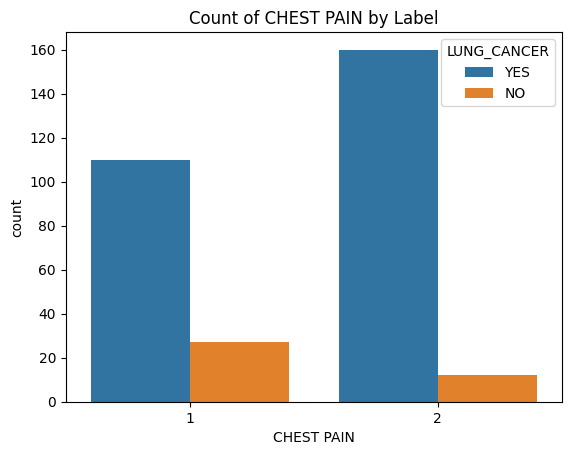

In [45]:
integer_encoded_features = list(filter(lambda x: x not in ["AGE", "LUNG_CANCER", "GENDER"], list(df.columns)))
for feature in integer_encoded_features:
    sns.countplot(data=df, x=feature, hue='LUNG_CANCER')
    plt.title(f'Count of {feature} by Label')
    plt.show()

In [14]:
df["LUNG_CANCER"].describe()

count     309
unique      2
top       YES
freq      270
Name: LUNG_CANCER, dtype: object

In [15]:
df["LUNG_CANCER"].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

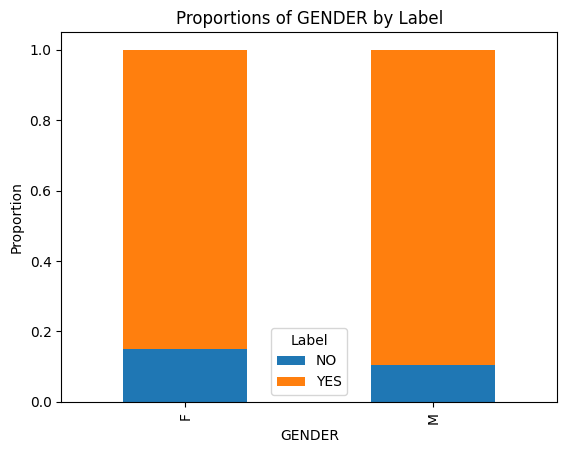

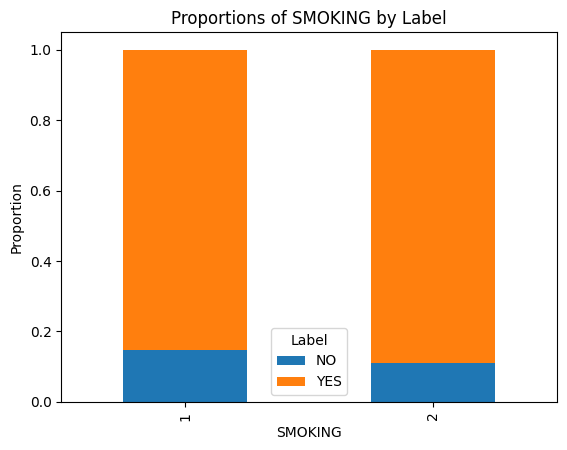

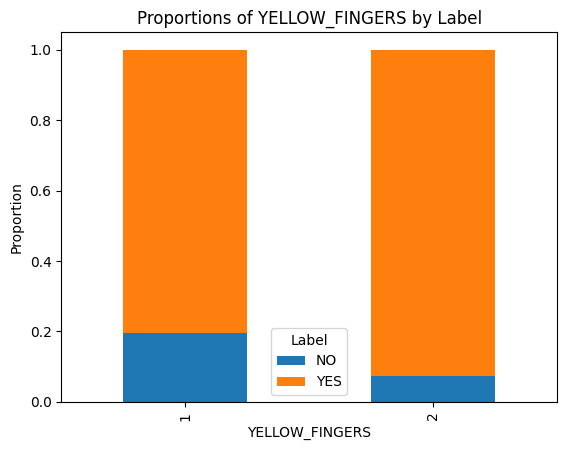

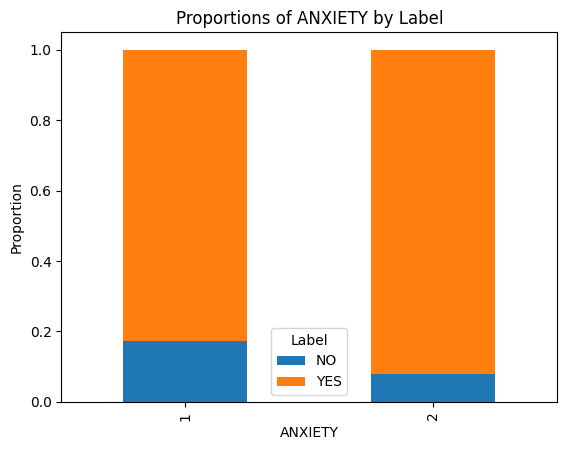

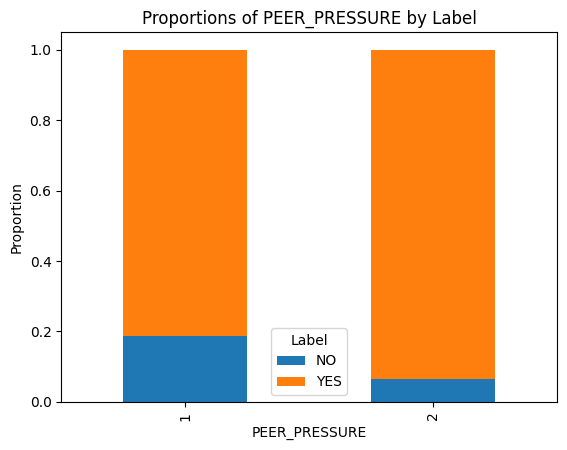

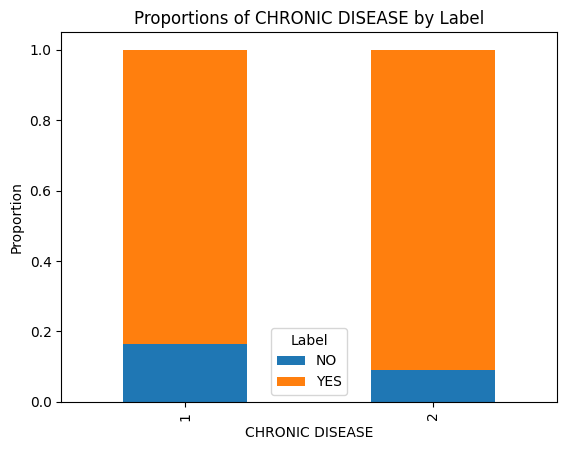

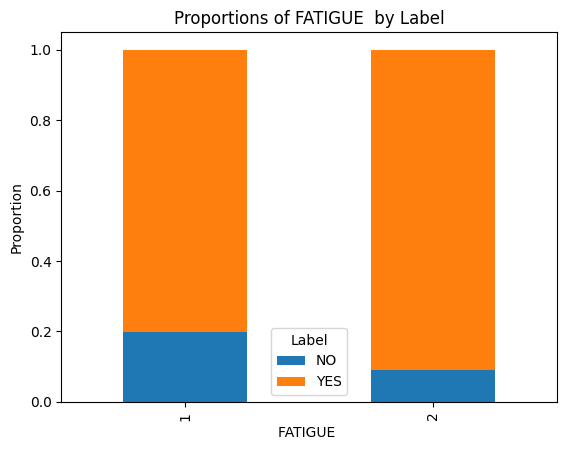

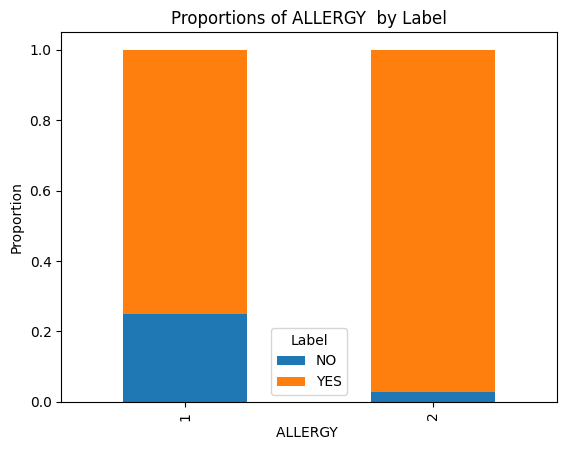

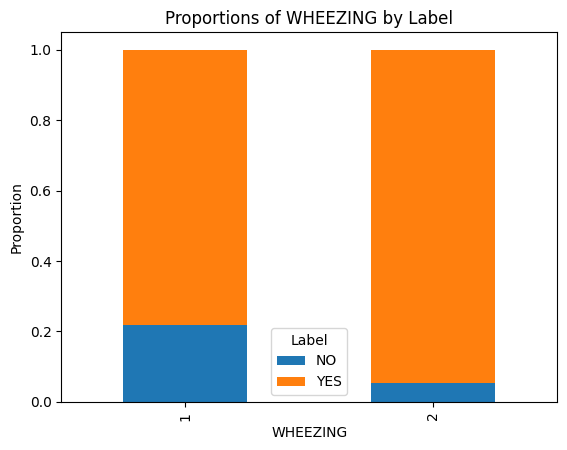

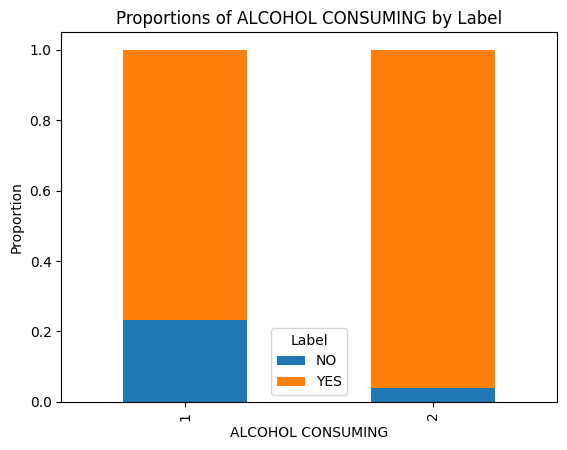

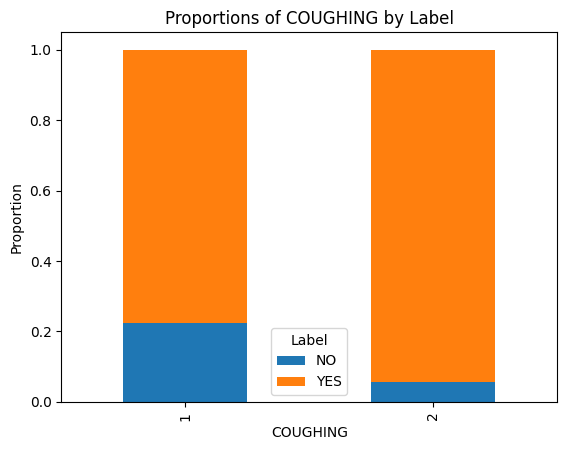

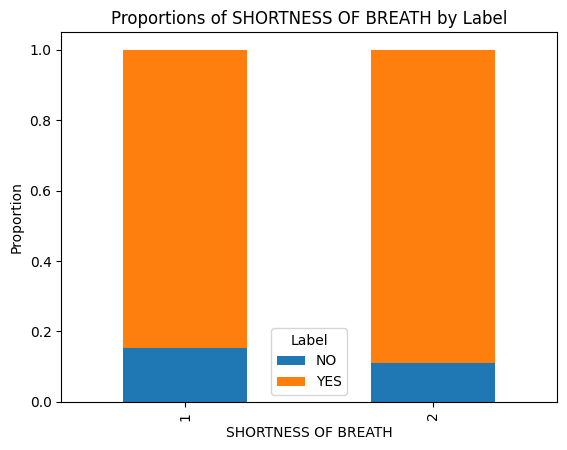

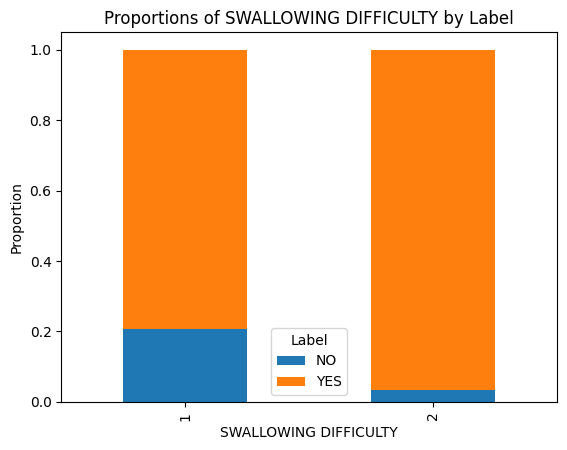

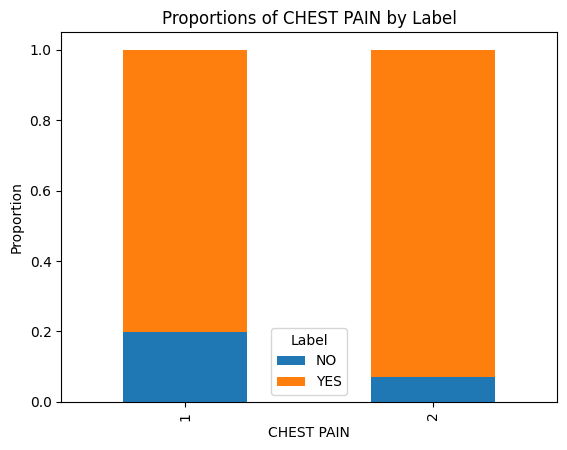

In [25]:
for feature in integer_encoded_features:
    category_counts = df.groupby([feature, "LUNG_CANCER"]).size().unstack().fillna(0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)

    category_proportions.plot(kind='bar', stacked=True)
    plt.title(f'Proportions of {feature} by Label')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(title='Label')
    plt.show()


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
age_reshaped = df["AGE"].values.reshape(-1, 1)
scaled_age = scaler.fit_transform(age_reshaped)
scaled_age = scaled_age.flatten()
pd.Series(scaled_age).describe()

count    309.000000
mean       0.631411
std        0.124399
min        0.000000
25%        0.545455
50%        0.621212
75%        0.727273
max        1.000000
dtype: float64

In [47]:
scaled_data = pd.DataFrame()
scaled_data["AGE"] = scaled_age
for feature in integer_encoded_features:
    scaler = MinMaxScaler()
    feature_reshaped = df[feature].values.reshape(-1, 1)
    scaled_feature = scaler.fit_transform(feature_reshaped)
    scaled_feature = scaled_feature.flatten()
    
    scaled_data[feature] = scaled_feature

In [48]:
scaled_data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [50]:
scaled_data["GENDER"] = df["GENDER"].apply(lambda x: 1 if x == "M" else 0)
scaled_data["LUNG_CANCER"] = df["LUNG_CANCER"].apply(lambda x: 1 if x == "YES" else 0)

In [53]:
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,0.631411,0.124399,0.0,0.545455,0.621212,0.727273,1.0
SMOKING,309.0,0.563107,0.496806,0.0,0.000000,1.000000,1.000000,1.0
YELLOW_FINGERS,309.0,0.569579,0.495938,0.0,0.000000,1.000000,1.000000,1.0
ANXIETY,309.0,0.498382,0.500808,0.0,0.000000,0.000000,1.000000,1.0
PEER_PRESSURE,309.0,0.501618,0.500808,0.0,0.000000,1.000000,1.000000,1.0
CHRONIC DISEASE,309.0,0.504854,0.500787,0.0,0.000000,1.000000,1.000000,1.0
FATIGUE,309.0,0.673139,0.469827,0.0,0.000000,1.000000,1.000000,1.0
ALLERGY,309.0,0.556634,0.497588,0.0,0.000000,1.000000,1.000000,1.0
WHEEZING,309.0,0.556634,0.497588,0.0,0.000000,1.000000,1.000000,1.0
ALCOHOL CONSUMING,309.0,0.556634,0.497588,0.0,0.000000,1.000000,1.000000,1.0


In [52]:
scaled_data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER,LUNG_CANCER
0,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
1,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1
2,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0
3,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0
4,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0


In [54]:
from sklearn.model_selection import train_test_split
X = scaled_data.drop("LUNG_CANCER", axis=1)
y = scaled_data["LUNG_CANCER"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((247, 15), (62, 15))

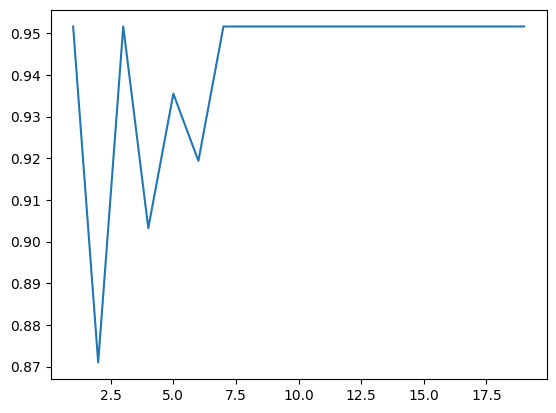

In [56]:
# Run KNN to classify and score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []
for nearest_neighbors in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=nearest_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    # get the sensitivity and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
plt.plot(range(1, 20), accuracy_scores)

count    3.090000e+02
mean     3.276775e-16
std      1.001622e+00
min     -5.083947e+00
25%     -6.920990e-01
50%     -8.212013e-02
75%      7.718503e-01
max      2.967774e+00
dtype: float64